### The Chaotic Pendulum

Consider a simple pendulum which is driven by an external harmonic force, such that the equation of motion for the pendulum is 
of the form

$$
\frac{d^2\theta}{dt^2} = -\left(\frac{g}{l}\right) \sin\theta - q \frac{d\theta}{dt} + F_D \sin(\omega_D t)
$$

There are *three* natural time scales to choose from (which are those?). Let us choose the natural time period 
of the pendulum (in absence of a driving force) as the natural time-scale, $T_0 = 2\pi\sqrt{l/g}$. Define $\tau$ as time measured in units of $T_0$. Then, the equation of motion reduces to 

$$
\frac{d^2\theta}{d\tau^2} = -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
$$

where $b = q T_0$, $A = F_D T_0^2$ and $\kappa = \omega_D T_0 = 2\pi (T_0/T_D)$. The equation of motion can be expressed as a system of coupled first order differential equations

$$
\begin{align}
\frac{d\theta}{dt} &= v \\
\frac{dv}{dt} &= -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
\end{align}
$$

We can write this system as follows

$$
\begin{align}
\frac{d\theta}{d\tau} &= f(\theta, v, \tau) \\
\frac{dv}{d\tau} &= g(\theta, v, \tau)
\end{align}
$$

where 

$$
\begin{align}
f(\theta, v, \tau) &= v \\
g(\theta, v, \tau) &= -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
\end{align}
$$

This system can be solved using the following RK4 algorithm

$$
\begin{align}
k1 &= \Delta\tau \ f(\theta(\tau), v(\tau), \tau) \\
q1 &= \Delta\tau \ g(\theta(\tau), v(\tau), \tau) \\
k2 &= \Delta\tau \ f(\theta(\tau) + 0.5 \ k1, v(\tau) + 0.5 \ q1, \tau + 0.5 \ \Delta\tau) \\
q2 &= \Delta\tau \ g(\theta(\tau) + 0.5 \ k1, v(\tau) + 0.5 \ q1, \tau + 0.5 \ \Delta\tau) \\
k3 &= \Delta\tau \ f(\theta(\tau) + 0.5 \ k2, v(\tau) + 0.5 \ q2, \tau + 0.5 \ \Delta\tau) \\
q3 &= \Delta\tau \ g(\theta(\tau) + 0.5 \ k2, v(\tau) + 0.5 \ q2, \tau + 0.5 \ \Delta\tau) \\
k4 &= \Delta\tau \ f(\theta(\tau) +  k3, v(\tau) + q3, \tau + \Delta\tau) \\
q4 &= \Delta\tau \ g(\theta(\tau) + k3, v(\tau) + q3, \tau + \Delta\tau) \\
\theta(\tau + \Delta\tau) &= \theta(\tau) + \frac{1}{6}(k1 + 2 \ k2 + 2 \ k3 + k4) \\
v(\tau + \Delta\tau) &= v(\tau) + \frac{1}{6}(q1 + 2 \ q2 + 2 \ q3 + q4)
\end{align}
$$

This is a very rich system, with diverse behaviour which varies with variation in damping force, amplitude of the driving force, 
the driving frequency, etc. We dive into this system systematically, controlling one variable at a time, while keeping others fixed. For definiteness, start with the amplitude of the external force zero, such that the system is simply a dampled pendulum. Start the motion with a small amplitude and zero velocity, and observe the behaviour for different values of the (dimensionless) damping constant. Once you are sure you get the expected behaviour, include the external driving force. This is where you will need to be really careful. For starters,  choose the following values of the parameters: $F_D = 0.5, q > 0.5, \omega_D = 2/3, T_0 = 2\pi$. Observe the behaviour of the system for varying values of the damping term. In particular, observe the phase plots for different initial conditions and observe what happens. 

In [2]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [3]:
def f(x,v,t):
  r= v
  return r

def g(x,v,t):
  r= -4*(m.pi)**2*(x)-b*f(x,v,t)+a*m.sin(k*t)
  return r

def rk4(x0,v0,t0,tn,n):

    h= (tn-t0)/n   # step size h
    time=[t0]          # list of t, x and y to append data
    thetas=[x0]
    velocity=[v0]
    for i in range(1,n):
      k1 = h*f(x0, v0, t0)
      q1 = h*g(x0, v0, t0)
      k2=h*f(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      q2=h*g(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      k3=h*f(x0+(k2)/2,v0+(q2)/2,(h)/2)
      q3=h*g(x0+(k2)/2,v0+(q2)/2,(h)/2)
      k4=h*f(x0+k3,v0+q3,t0+h)
      q4=h*g(x0+k3,v0+q3,t0+h)
        
        
      x1 = x0 + (1/6)*(k1+2*k2+2*k3+k4)
      v1 = v0 + (1/6)*(q1+2*q2+2*q3+q4)
      t1 = t0 + h

      thetas.append(x1)
      velocity.append(v1)
      time.append(t1)

      x0 = x1         # assign the modified values og x0 and y0 for the next iteration
      v0 = v1
      t0 = t1
      plt. plot(thetas,velocity)
    return (thetas,velocity,time)

In [5]:
def f(x,v,t):
  r= v
  return r

def g(x,v,t):
  r= -4*(m.pi)**2*m.sin(x)-b*f(x,v,t)+a*m.sin(k*t)
  #r= -4*(m.pi)**2*(x)-b*f(x,v,t)+a*m.sin(k*t)
  return r

def rk4(x0,v0,t0,tn,n):

    h= (tn-t0)/n   # step size h
    time=[t0]          # list of t, x and y to append data
    thetas=[x0]
    velocity=[v0]
    for i in range(1,n):
      k1 = h*f(x0, v0, t0)
      q1 = h*g(x0, v0, t0)
      k2=h*f(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      q2=h*g(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      k3=h*f(x0+(k2)/2,v0+(q2)/2,(h)/2)
      q3=h*g(x0+(k2)/2,v0+(q2)/2,(h)/2)
      k4=h*f(x0+k3,v0+q3,t0+h)
      q4=h*g(x0+k3,v0+q3,t0+h)
        
        
      x1 = x0 + (1/6)*(k1+2*k2+2*k3+k4)
      v1 = v0 + (1/6)*(q1+2*q2+2*q3+q4)
      t1 = t0 + h

      thetas.append(x1)
      velocity.append(v1)
      time.append(t1)

      x0 = x1         # assign the modified values og x0 and y0 for the next iteration
      v0 = v1
      t0 = t1
      plt. plot(thetas,velocity)
    return (thetas,velocity,time)

<IPython.core.display.Javascript object>


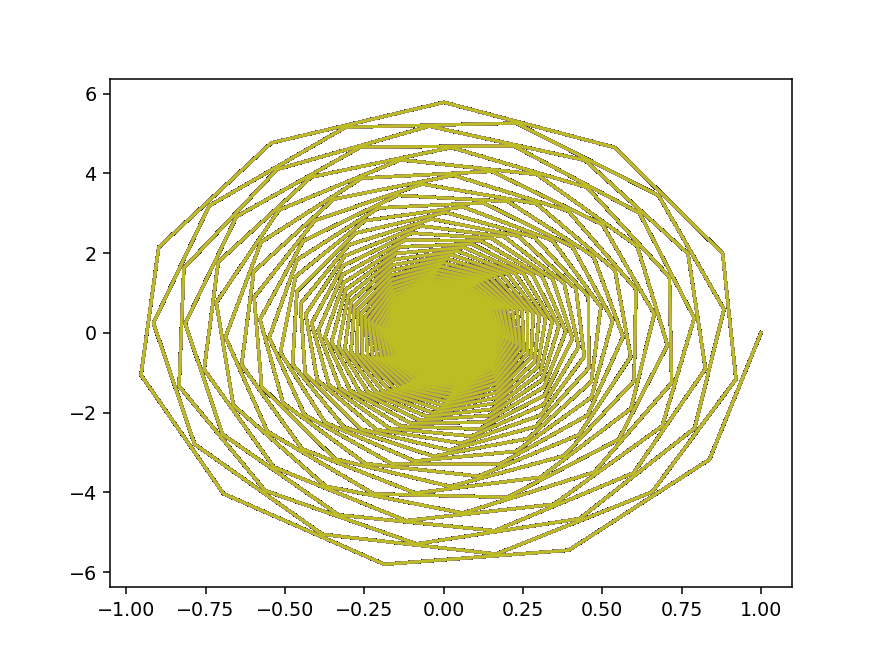

In [6]:
k=4*m.pi/3
x0=1
v0=0
t0=0
tn=100
n=1000
a=0
b=0.1
x,y,z=rk4(x0,v0,t0,tn,n)

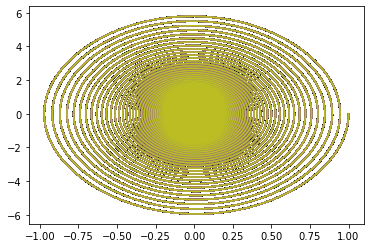

In [5]:
k=4*m.pi/3
x0=1
v0=0
t0=0
tn=100
n=10000
a=0
b=0.1
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


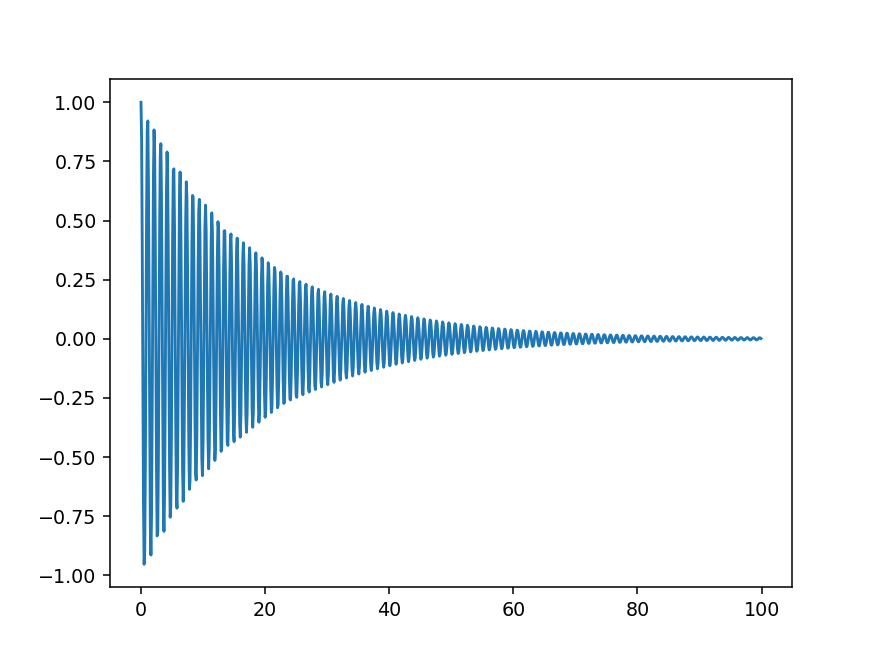

In [48]:
plt.plot(z,x)
#theta vs time

<IPython.core.display.Javascript object>


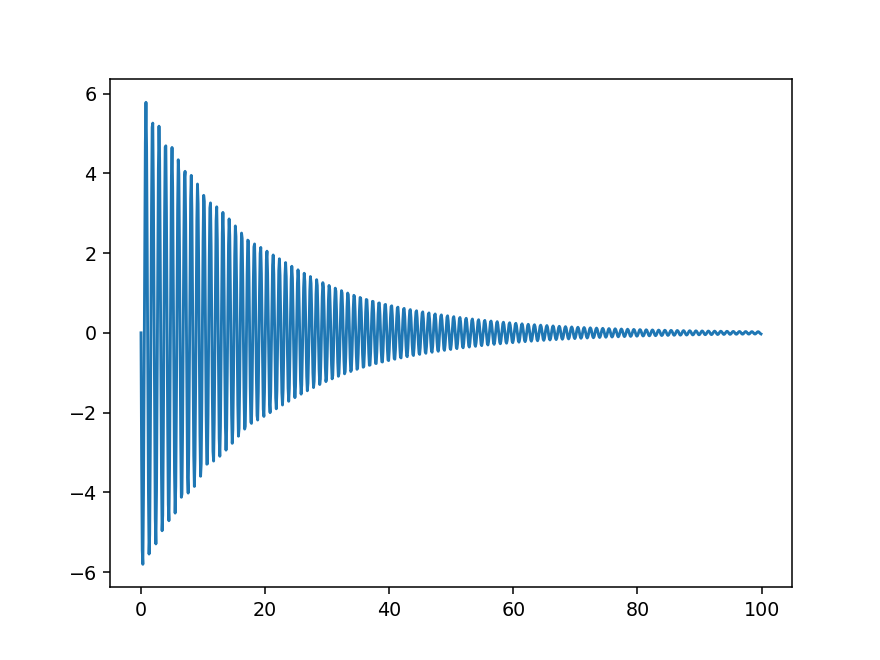

In [49]:
plt.plot(z,y)
#theta vs velocity 

<IPython.core.display.Javascript object>


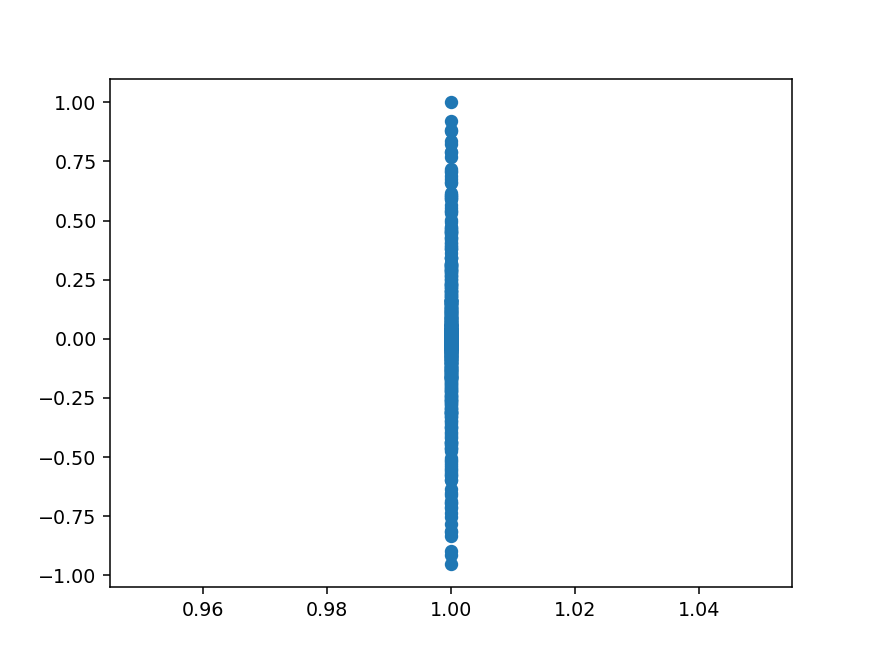

In [11]:
%matplotlib notebook
k=4*m.pi/3
x0=4
v0=0
t0=0
tn=10
n=1000
a=2
b=0.54
theta=[]
aa=[]
for a in range(1,75,100):
  for i in x:
    if i>-m.pi and i<m.pi:
      theta.append(i)
      aa.append(a)
plt.scatter(aa,theta)

In [15]:
tau=3*n/2
t=n*TD
for a in range(0,500,1000):
    new_theta=[]
    for i in theta:
      if i>m.pi:
          i=i-2*m.pi
      else:
          i=i+2*m.pi
    i.append(new_theta)
    for abs(tau-)

t=nTd 

tau=3n/2 


check for mod(tau-3n/2)<$delta$ tau/2

<IPython.core.display.Javascript object>


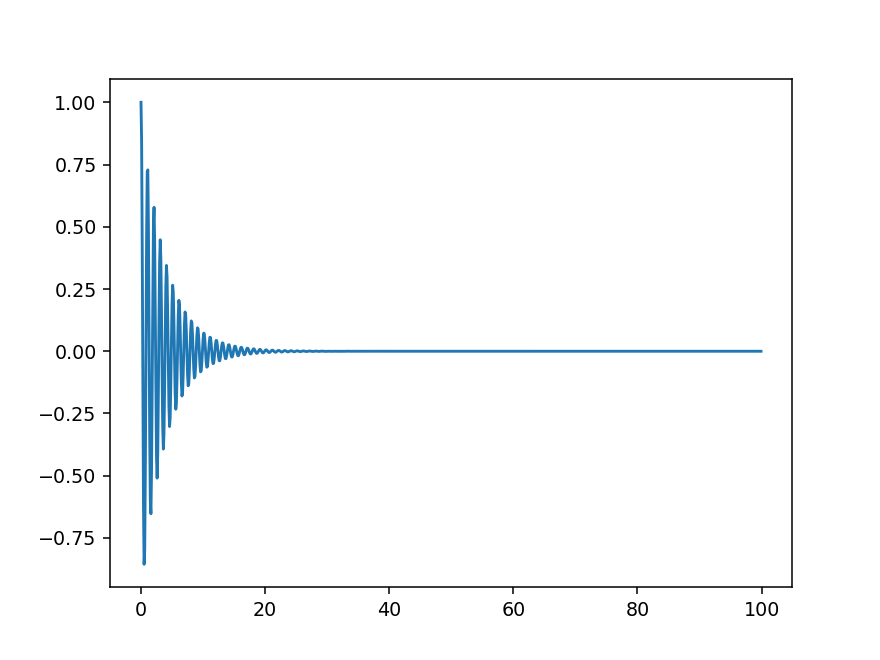

In [51]:
plt.plot(z,x)

<IPython.core.display.Javascript object>


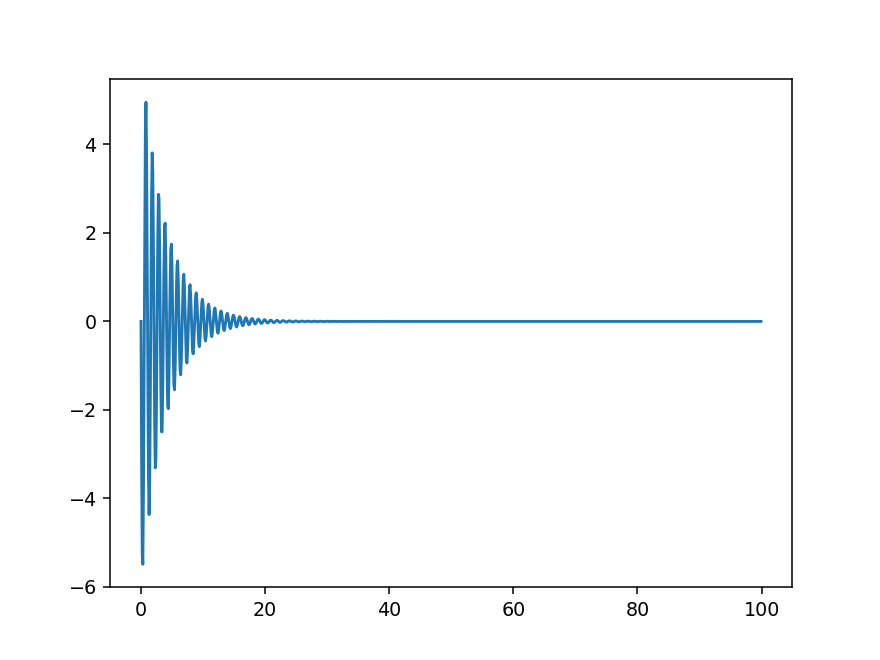

In [52]:
plt.plot(z,y)

<IPython.core.display.Javascript object>


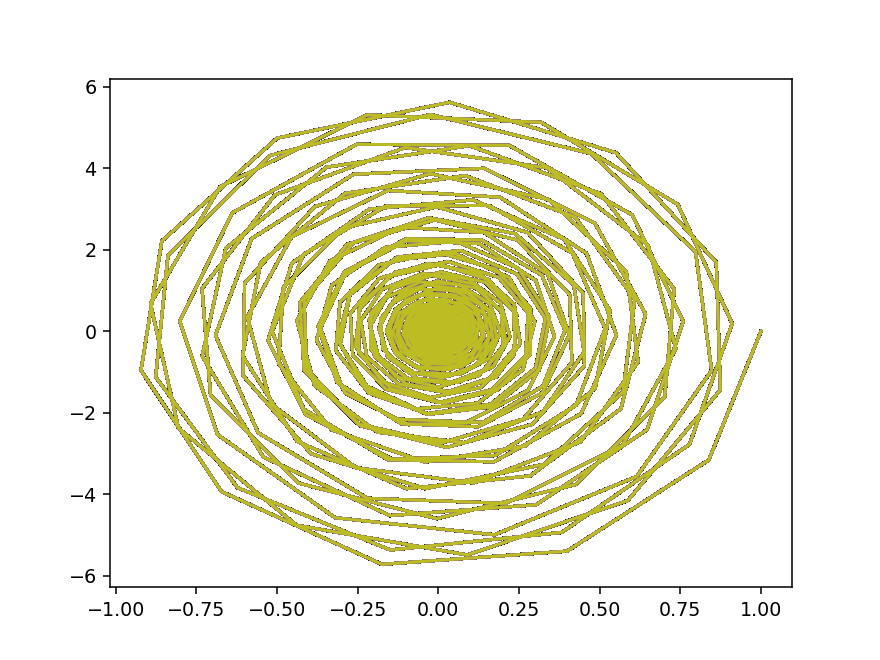

In [53]:
k=4*m.pi/3
x0=1
v0=0
t0=0
tn=100
n=1000
a=1
b=0.1
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


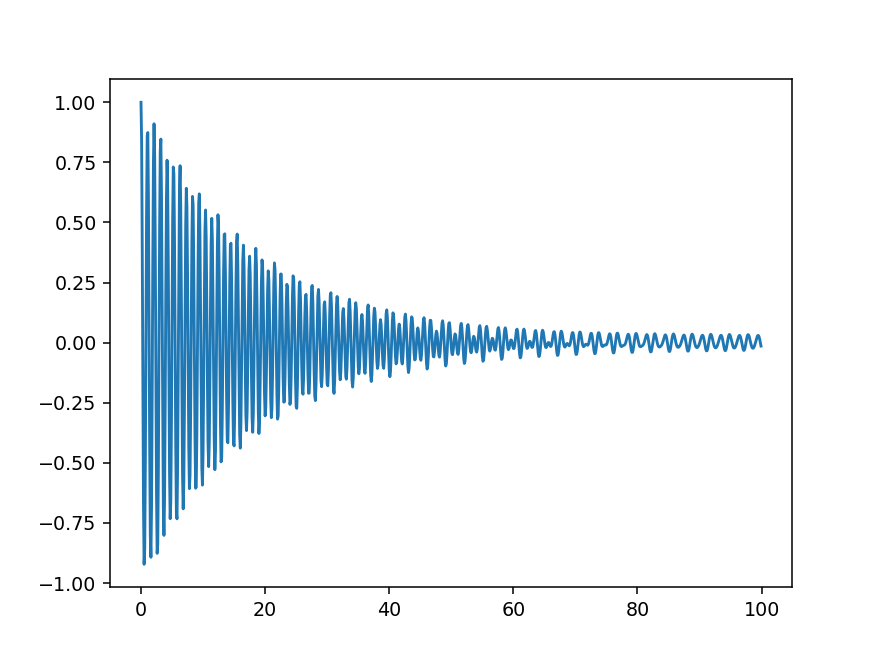

In [54]:
plt.plot(z,x)

<IPython.core.display.Javascript object>


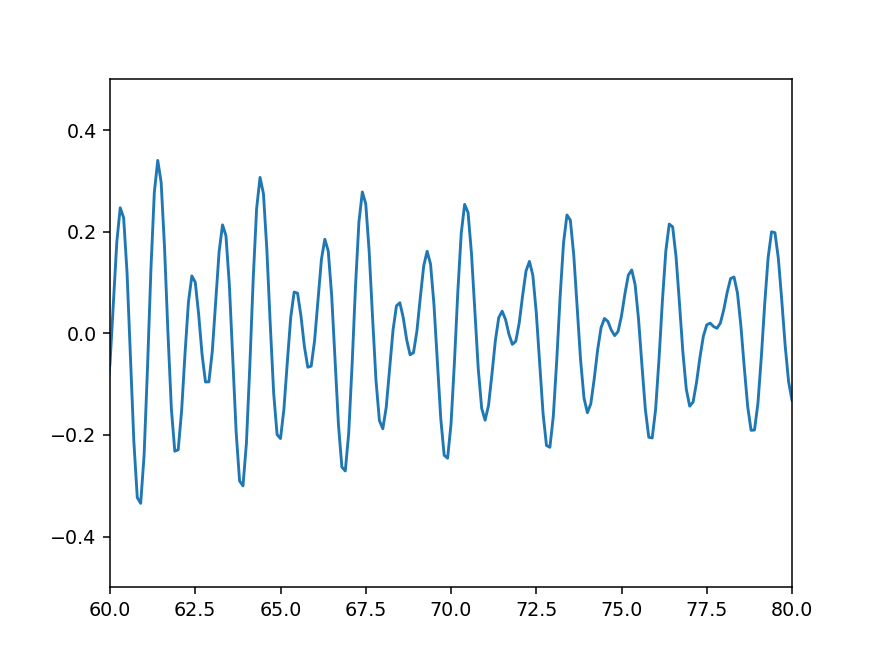

(-0.5, 0.5)

In [58]:
plt.plot(z,y)
plt.xlim(60,80)
plt.ylim(-0.5,0.5)

<IPython.core.display.Javascript object>


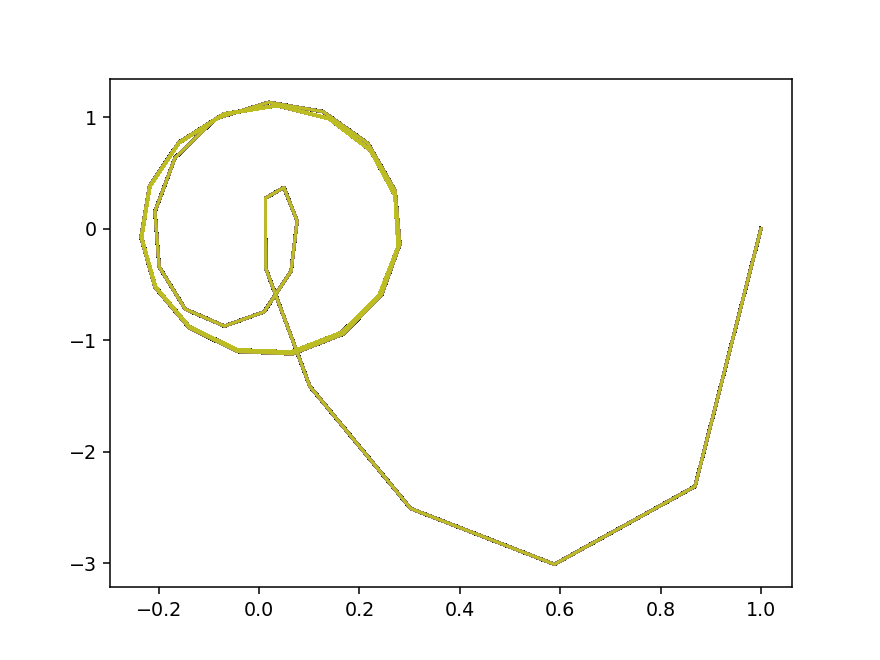

In [61]:
k=4*m.pi/3
x0=1
v0=0
t0=0
tn=100
n=1000
a=12
b=5
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


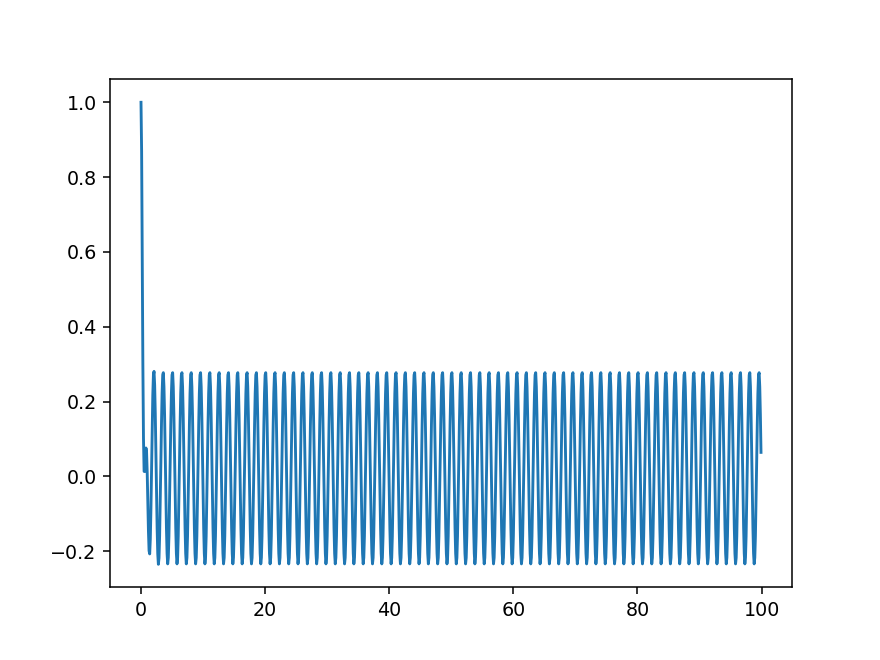

In [62]:
plt.plot(z,x)

<IPython.core.display.Javascript object>


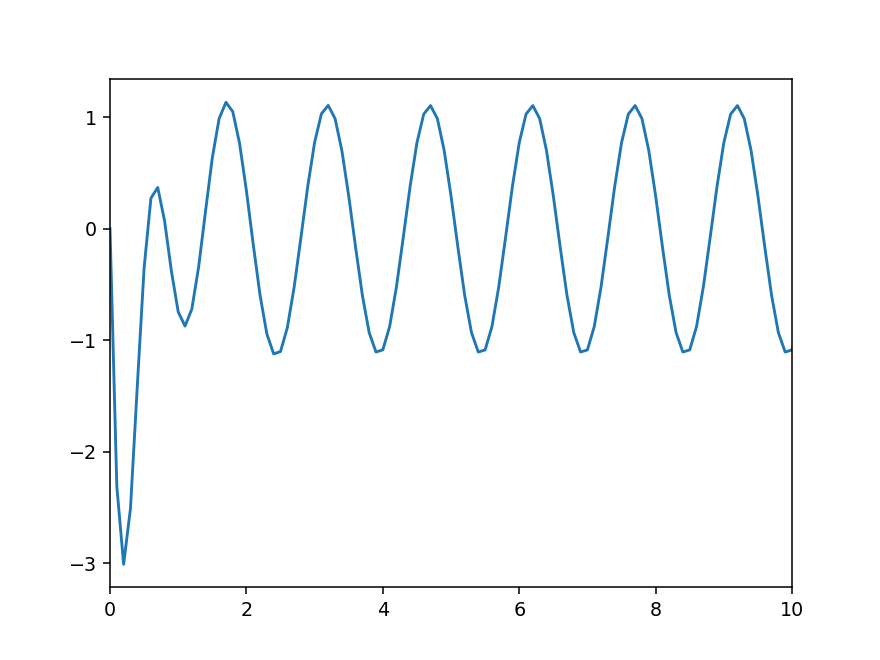

(0.0, 10.0)

In [64]:
plt.plot(z,y)
plt.xlim(0,10)

<IPython.core.display.Javascript object>


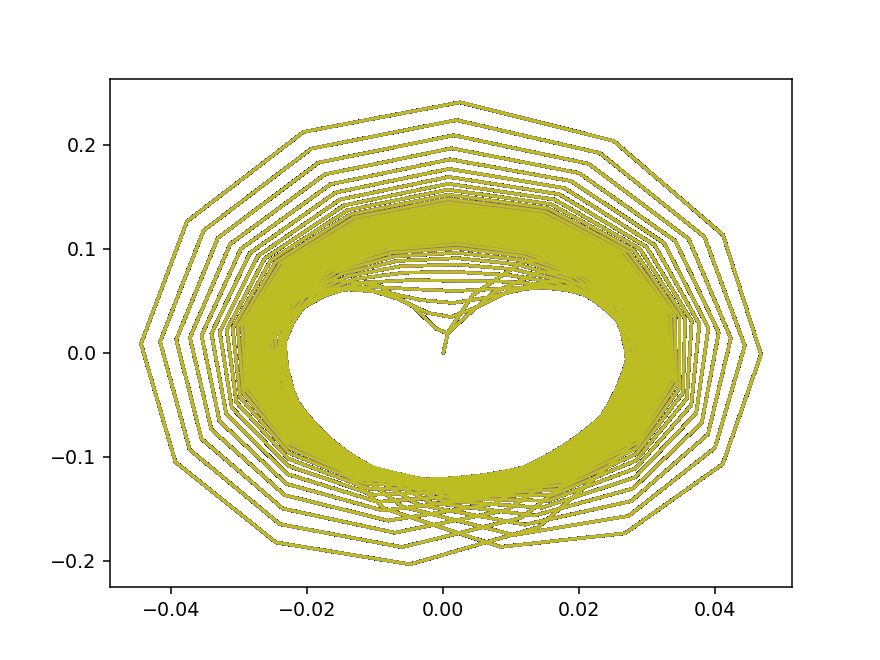

In [65]:
k=4*m.pi/3
x0=0
v0=0
t0=0
tn=100
n=1000
a=1
b=0.1
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


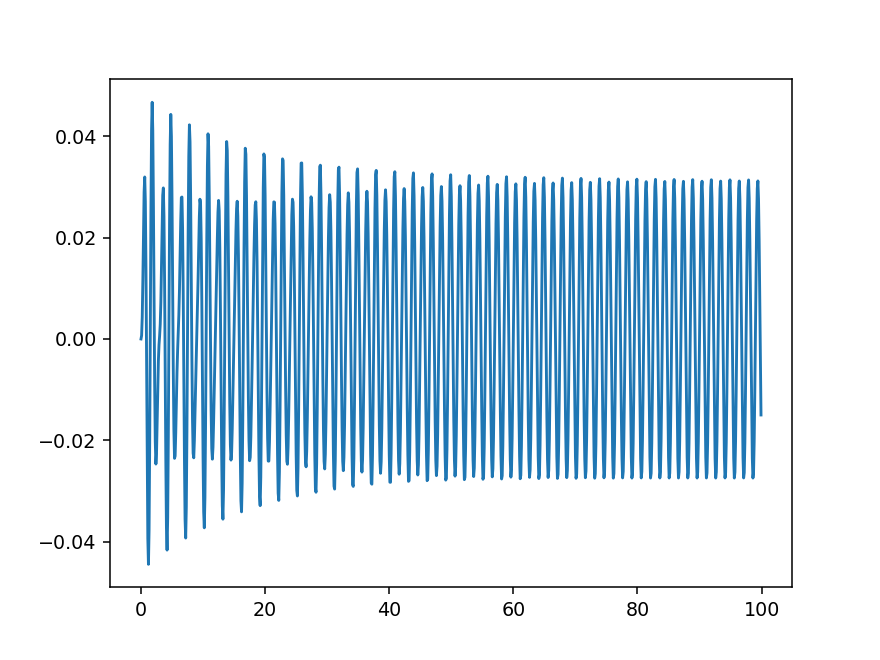

In [72]:
plt.plot(z,x)
#plt.xlim(40,60)

<IPython.core.display.Javascript object>


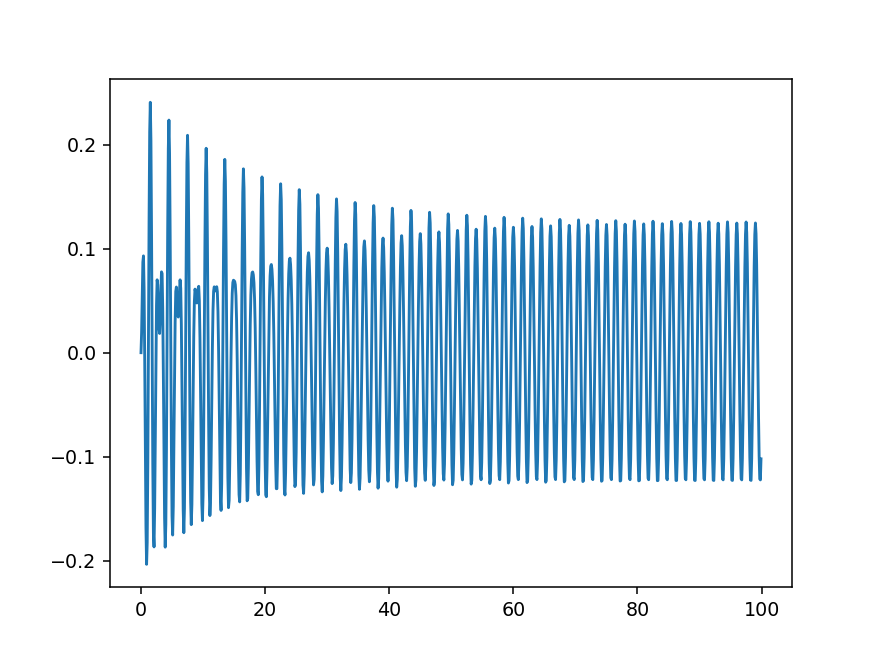

In [67]:
plt.plot(z,y)

<IPython.core.display.Javascript object>


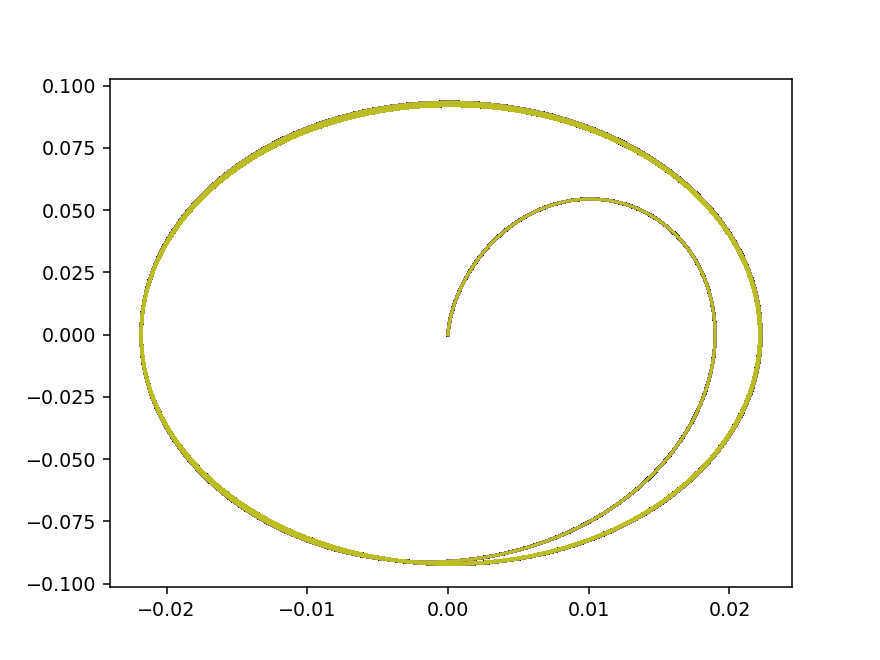

In [77]:
k=4*m.pi/3
x0=0
v0=0
t0=0
tn=100
n=10000
a=1
b=5
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


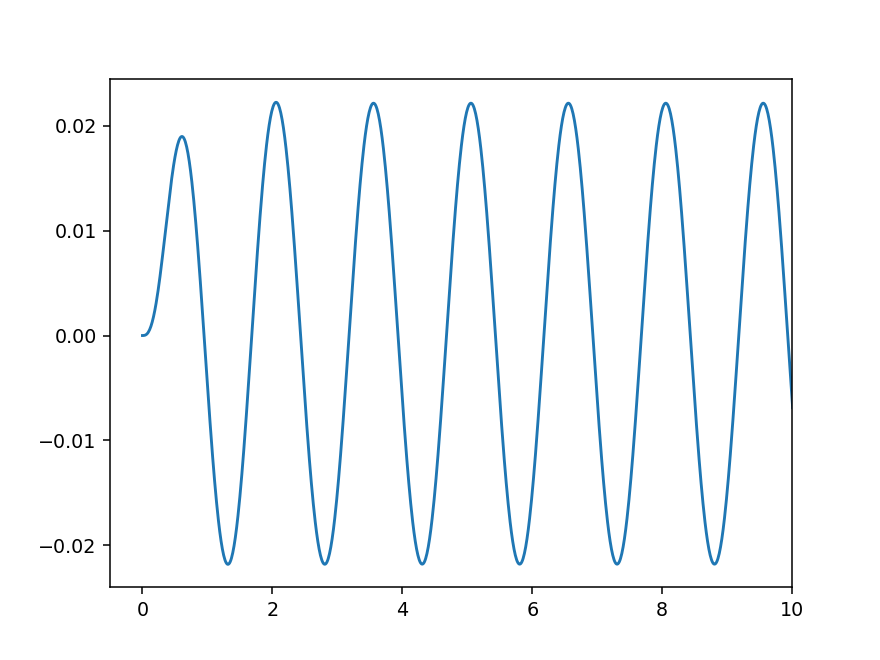

(-0.5, 10.0)

In [79]:
plt.plot(z,x)
plt.xlim(-0.5,10)

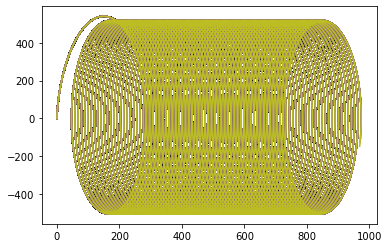

In [7]:
k=4*m.pi/3
x0=0
v0=0
t0=0
tn=100
n=10000
a=5000
b=5
x,y,z=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


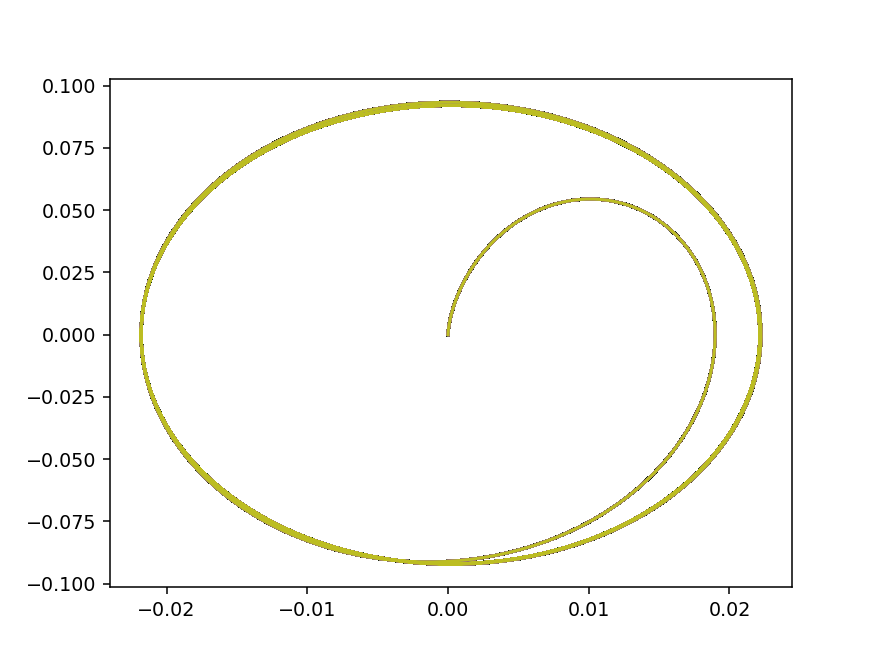

In [91]:
k=4*m.pi/3
x0=0
v0=0
t0=0
tn=10
n=1000
a=1
b=5
x,y,z=rk4(x0,v0,t0,tn,n)

(0.0, 350.0)

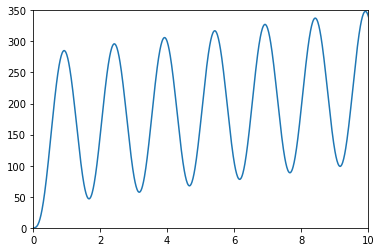

In [11]:
plt.plot(z,x)
plt.xlim(0,10)
plt.ylim(0,350)

<IPython.core.display.Javascript object>


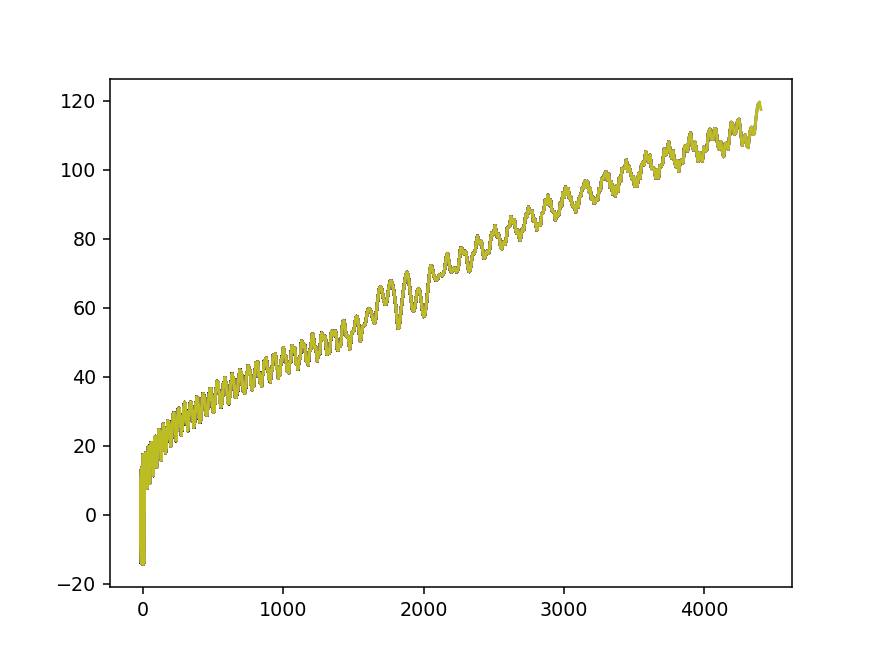

In [82]:
t0=2*m.pi
fd=0.5
#k=4pi/3, b=0, a=2pi^2
q=0
wd=2/3
b=q*t0
a=fd*(t0)**2
k=wd*t0
x0=5
v0 = 1
t0 = 0
tn = 100
n=1000
A,B,C=rk4(x0,v0,t0,tn,n)

as the driving force is high, with no damping higher order sine terms are added and thus a non shm behaviour is obtained.

<IPython.core.display.Javascript object>


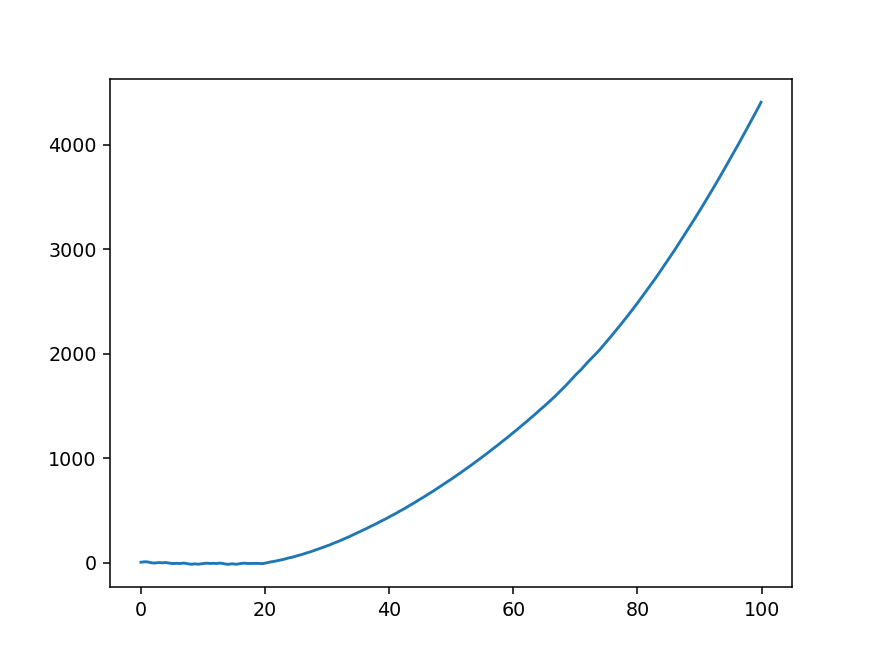

In [83]:
plt.plot(C,A)
#theta time

<IPython.core.display.Javascript object>


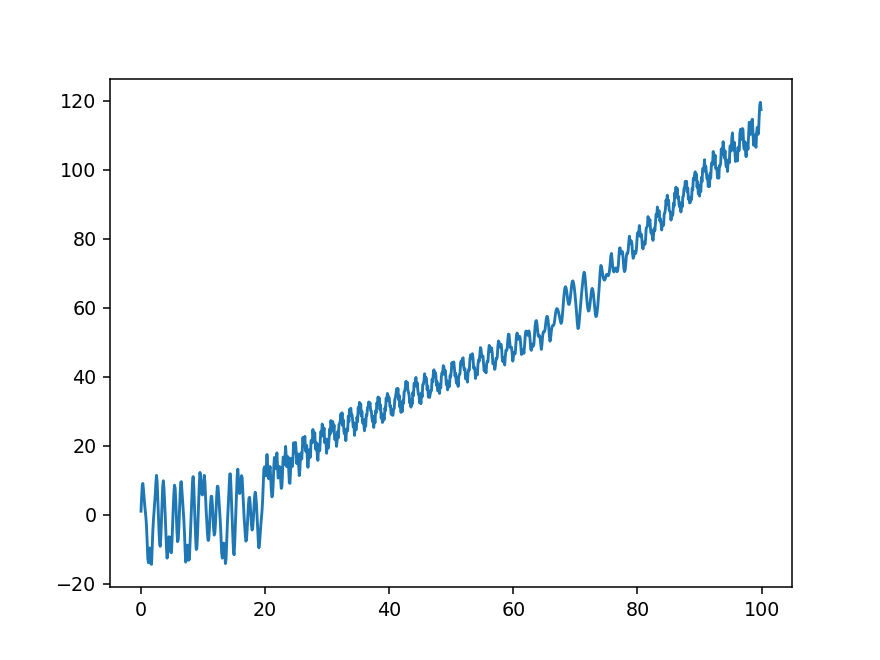

In [86]:
plt.plot(C,B)
#velocity time

C:\Users\pankh\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


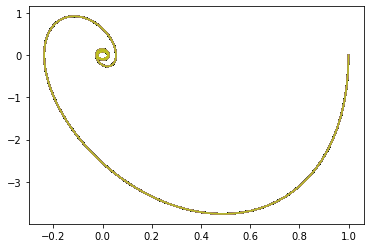

In [7]:
k=4*m.pi/3
x0=np.linspace(1,5,1)
v0=0
t0=0
tn=10
n=1000
a=1
b=5
for i in x0:
  x,y,z=rk4(x0,v0,t0,tn,n)
plt.show()

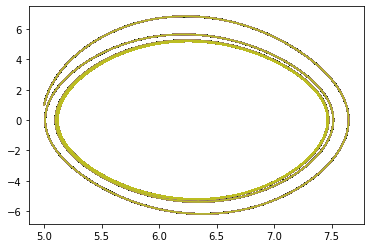

In [19]:
t0=2*m.pi
fd=1
q=0.6
wd=2/3
b=q*t0
a=fd*(t0)**2
k=wd*t0
x0=5
v0 = 1
t0 = 0
tn = 100
n=10000
A,B,C=rk4(x0,v0,t0,tn,n)

<IPython.core.display.Javascript object>


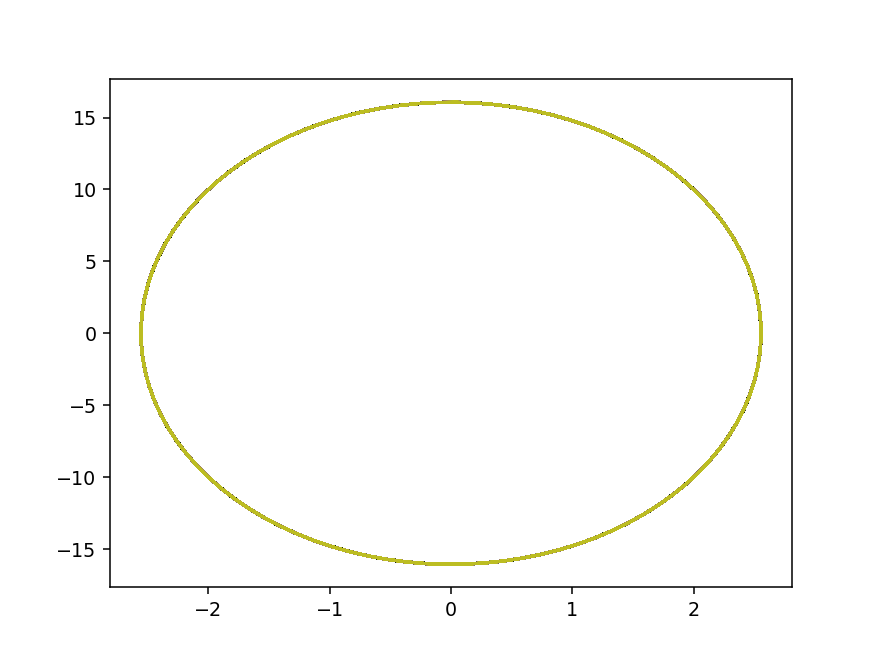

In [28]:
t0=10*m.pi
fd=0
q=0
wd=2/3
b=q*t0
a=fd*(t0)**2
k=wd*t0
x0=2
v0 = 10
t0 = 0
tn = 10
n=1000
A,B,C=rk4(x0,v0,t0,tn,n) #A=theta, B= velocity, C=time 

<IPython.core.display.Javascript object>


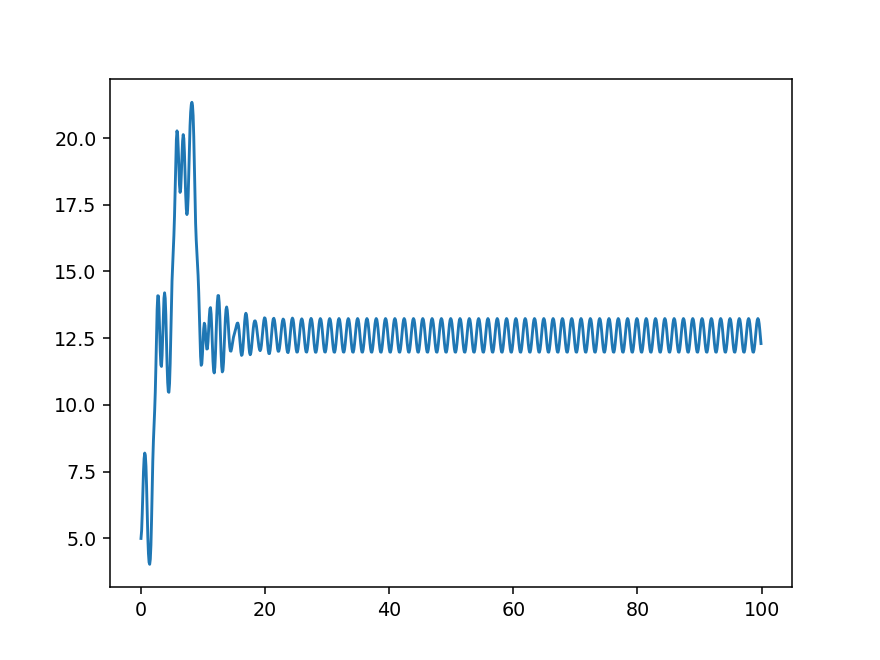

In [16]:
plt.plot(C,A)

<IPython.core.display.Javascript object>


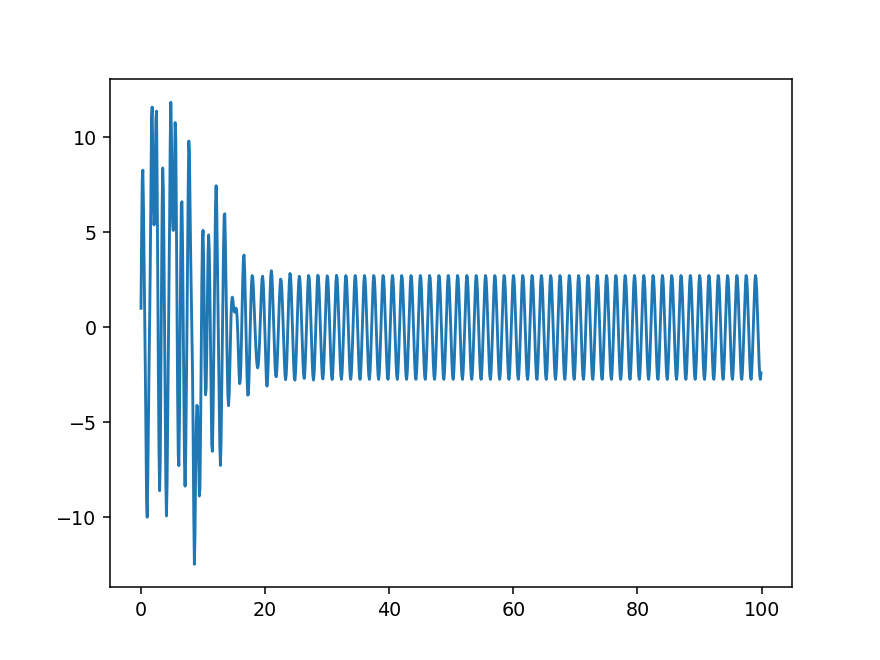

In [17]:
plt.plot(C,B)

In [37]:
def f(x,v,t):
  r= v
  return r

def g(x,v,t):
  r= -4*(m.pi)**2*(x)-b*f(x,v,t)+a*m.sin(k*t)
  return r

def rk4(x0,v0,t0,tn,n):

    h= (tn-t0)/n   # step size h
    time=[t0]          # list of t, x and y to append data
    thetas=[x0]
    velocity=[v0]
    for i in range(1,n):
      k1 = h*f(x0, v0, t0)
      q1 = h*g(x0, v0, t0)
      k2=h*f(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      q2=h*g(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      k3=h*f(x0+(k2)/2,v0+(q2)/2,(h)/2)
      q3=h*g(x0+(k2)/2,v0+(q2)/2,(h)/2)
      k4=h*f(x0+k3,v0+q3,t0+h)
      q4=h*g(x0+k3,v0+q3,t0+h)
        
        
      x1 = x0 + (1/6)*(k1+2*k2+2*k3+k4)
      v1 = v0 + (1/6)*(q1+2*q2+2*q3+q4)
      t1 = t0 + h

      thetas.append(x1)
      velocity.append(v1)
      time.append(t1)

      x0 = x1         # assign the modified values og x0 and y0 for the next iteration
      v0 = v1
      t0 = t1
#       plt. plot(thetas,velocity)
    return (thetas,velocity,time)

<IPython.core.display.Javascript object>


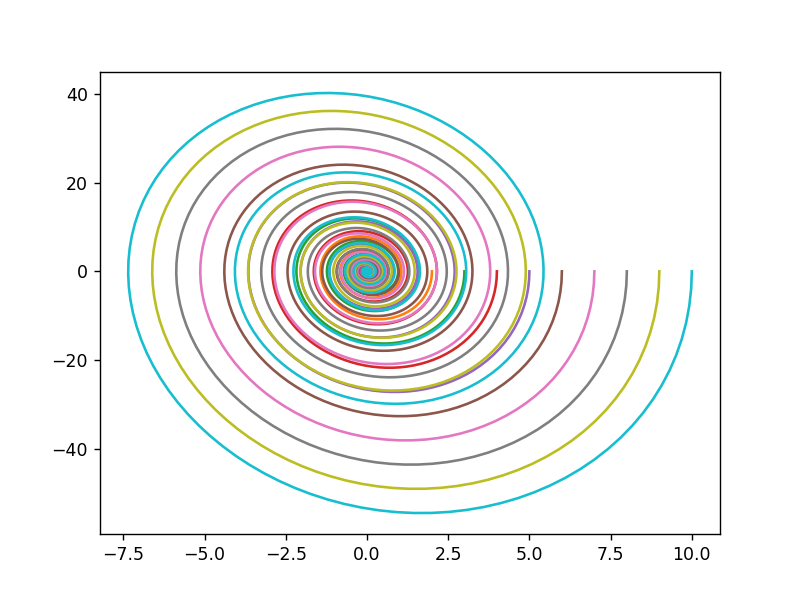

In [38]:
%matplotlib notebook
theta_list=np.array([0,1,2,3,4,5,6,7,8,9,10])
x0=1
v0=0
t0=0
tn=10
n=1000

a=2
b=1.2
k=(4*m.pi)/3
for i in range(1,len(theta_list)):
  x,v_list,z=rk4(i,v0,t0,tn,n)
  plt.plot(x,v_list)
#   plt.xlim(-2.5,2.5)
#   plt.ylim(-20,20)

<IPython.core.display.Javascript object>


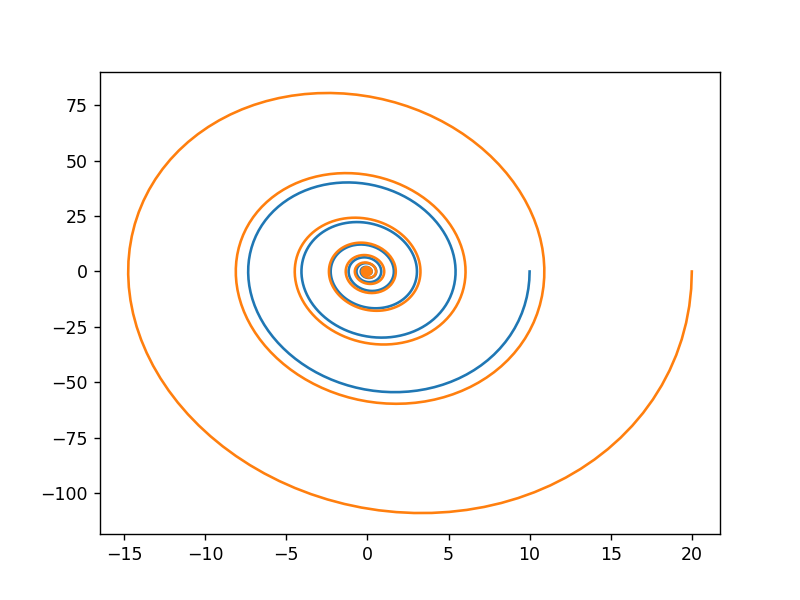

In [31]:
theta_list=[10,20]

x0=1
v0=0
t0=0
tn=100
n=10000

a=2
b=1.2
k=(4*m.pi)/3
for i in theta_list:
  x,v_list,z=rk4(i,v0,t0,tn,n)
  plt.plot(x,v_list)
  plt.show()

<IPython.core.display.Javascript object>


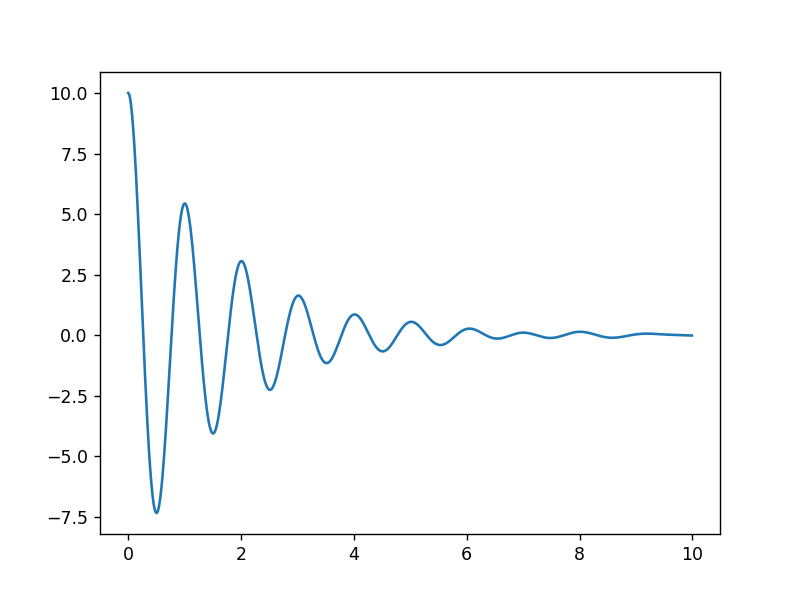

In [39]:
  plt.plot(z,x)

In [1]:
def f(x,v,t):
  r= v
  return r

def g(x,v,t):
  r= -4*(m.pi)**2*(x)-b*f(x,v,t)+a*m.sin(k*t)
  return r

def rk4(x0,v0,t0,tn,n):

    h= (tn-t0)/n   # step size h
    time=[t0]          # list of t, x and y to append data
    thetas=[x0]
    velocity=[v0]
    for i in range(1,n):
      k1 = h*f(x0, v0, t0)
      q1 = h*g(x0, v0, t0)
      k2=h*f(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      q2=h*g(x0+(k1)/2,v0+(q1)/2,t0+(h)/2)
      k3=h*f(x0+(k2)/2,v0+(q2)/2,(h)/2)
      q3=h*g(x0+(k2)/2,v0+(q2)/2,(h)/2)
      k4=h*f(x0+k3,v0+q3,t0+h)
      q4=h*g(x0+k3,v0+q3,t0+h)
        
        
      x1 = x0 + (1/6)*(k1+2*k2+2*k3+k4)
      v1 = v0 + (1/6)*(q1+2*q2+2*q3+q4)
      t1 = t0 + h

      thetas.append(x1)
      velocity.append(v1)
      time.append(t1)

      x0 = x1         # assign the modified values og x0 and y0 for the next iteration
      v0 = v1
      t0 = t1
#       plt. plot(thetas,velocity)
    return (thetas,velocity,time)